Тема “Классификация текста”

В качестве заготовки для задания прогоним часть 2ого домашнего задания. Нам необходимо получить разреженные матрицы, используя CountVectorizer, TfidfVectorizer для 'tweet_stemmed' и 'tweet_lemmatized' столбцов (4 матрицы).

Задание 1. Построим модель LogisticRegression, используя Bag-of-Words признаки для столбца combine_df['tweet_stemmed'].

Поделим Bag-of-Words признаки на train, test (train заканчивается на 31962 строке combine_df)
Ответами является столбец train_df['label']
Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int
Рассчитаем f1_score
Повторим аналогично для столбца combine_df['tweet_lemmatized'].



In [10]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn import decomposition, ensemble
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re
import xgboost, textblob, string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [11]:
with open('/content/drive/My Drive/clean.pkl', 'rb') as f:
    combine_df = pickle.load(f)

In [12]:
for col in ['tweet_stemmed', 'tweet_lemmatized']:
    combine_df[col] = combine_df[col].apply(lambda text_list: ' '.join(text_list))

combine_df.head()

,id,label,tweet,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...",father dysfunct selfish drag kid dysfunct run,father dysfunctional selfish drag kid dysfunct...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit can use cause they do n...,"[thanks, for, lyft, credit, can, use, cause, t...","[thanks, lyft, credit, use, cause, offer, whee...",thank lyft credit use caus offer wheelchair va...,thanks lyft credit use cause offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]",bihday majesti,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,model love you take with you all the time in your,"[model, love, you, take, with, you, all, the, ...","[model, love, take, time]",model love take time,model love take time
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]",factsguid societi motiv,factsguide society motivation


In [28]:
train = combine_df[:31962]
test = combine_df[31962:]

train['label'] = train['label'].astype('int64', copy=True)
train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,label,tweet,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...",father dysfunct selfish drag kid dysfunct run,father dysfunctional selfish drag kid dysfunct...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit can use cause they do n...,"[thanks, for, lyft, credit, can, use, cause, t...","[thanks, lyft, credit, use, cause, offer, whee...",thank lyft credit use caus offer wheelchair va...,thanks lyft credit use cause offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]",bihday majesti,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love you take with you all the time in your,"[model, love, you, take, with, you, all, the, ...","[model, love, take, time]",model love take time,model love take time
4,5,0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]",factsguid societi motiv,factsguide society motivation
...,...,...,...,...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu,"[ate, isz, that, youuu]","[ate, isz, youuu]",ate isz youuu,ate isz youuu
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to w...,"[to, see, nina, turner, on, the, airwaves, try...","[see, nina, turner, airwaves, trying, wrap, ma...",see nina turner airwav tri wrap mantl genuin h...,see nina turner airwave trying wrap mantle gen...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on monday morning otw t...,"[listening, to, sad, songs, on, monday, mornin...","[listening, sad, songs, monday, morning, otw, ...",listen sad song monday morn otw work sad,listening sad song monday morning otw work sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised in in calgary wso conde...,"[sikh, temple, vandalised, in, in, calgary, ws...","[sikh, temple, vandalised, calgary, wso, conde...",sikh templ vandalis calgari wso condemn act,sikh temple vandalised calgary wso condemns act


In [32]:
treashold = 0.3
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(train['tweet_stemmed'], 
                                                                      train['label'], 
                                                                      random_state=13)
count_vectorizer = CountVectorizer(max_df=0.9, 
                                   max_features = 5000, 
                                   stop_words='english', 
                                   analyzer='word', 
                                   token_pattern=r'\w{1,}')

xtrain_count =  count_vectorizer.fit_transform(train_x)
xvalid_count =  count_vectorizer.transform(valid_x)

lr = linear_model.LogisticRegression(class_weight="balanced").fit(xtrain_count, train_y)
predicted = lr.predict_proba(xvalid_count)[:, 1]

int_predicted = np.where(predicted >= treashold, 1, 0)

f1_count_stem = f1_score(valid_y, int_predicted)
f1_count_stem

0.4678851174934726

In [33]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(train['tweet_lemmatized'], 
                                                                      train['label'],
                                                                      random_state=13)

count_vectorizer = CountVectorizer(max_df=0.9, 
                                   max_features = 5000, 
                                   stop_words='english', 
                                   analyzer='word', 
                                   token_pattern=r'\w{1,}')

xtrain_count =  count_vectorizer.fit_transform(train_x)
xvalid_count =  count_vectorizer.transform(valid_x)

lr = linear_model.LogisticRegression(class_weight="balanced").fit(xtrain_count, train_y)
predicted = lr.predict_proba(xvalid_count)[:, 1]

int_predicted = np.where(predicted >= treashold, 1, 0)

f1_count_lem = f1_score(valid_y, int_predicted)
f1_count_lem

0.44908350305498984

Задание 2. Построим модель LogisticRegression, используя TF-IDF признаки для столбца combine_df['tweet_stemmed'].

Поделим TF-IDF признаки на train, test (train заканчивается на 31962 строке combine_df)
Ответами является столбец train_df['label']
Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int
Рассчитаем f1_score
Повторим аналогично для столбца combine_df['tweet_lemmatized'].

In [34]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(train['tweet_stemmed'], 
                                                                      train['label'],
                                                                      random_state=13)


tfidf_vectorizer = TfidfVectorizer(max_df=0.9, 
                                   max_features = 5000, 
                                   stop_words='english', 
                                   analyzer='word', 
                                   token_pattern=r'\w{1,}')

xtrain_tfidf =  tfidf_vectorizer.fit_transform(train_x)
xvalid_tfidf =  tfidf_vectorizer.transform(valid_x)

lr = linear_model.LogisticRegression(class_weight="balanced").fit(xtrain_tfidf, train_y)
predicted = lr.predict_proba(xvalid_tfidf)[:, 1]

int_predicted = np.where(predicted >= treashold, 1, 0)

f1_tfidf_stem = f1_score(valid_y, int_predicted)
f1_tfidf_stem

0.42405345211581297

In [35]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(train['tweet_lemmatized'], 
                                                                      train['label'],
                                                                      random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_df=0.9, 
                                   max_features = 5000, 
                                   stop_words='english', 
                                   analyzer='word', 
                                   token_pattern=r'\w{1,}')

xtrain_tfidf =  tfidf_vectorizer.fit_transform(train_x)
xvalid_tfidf =  tfidf_vectorizer.transform(valid_x)

lr = linear_model.LogisticRegression(class_weight="balanced").fit(xtrain_tfidf, train_y)
predicted = lr.predict_proba(xvalid_tfidf)[:, 1]

int_predicted = np.where(predicted >= treashold, 1, 0)

f1_tfidf_lem = f1_score(valid_y, int_predicted)
f1_tfidf_lem

0.43895989422653153



Задание 3. Выведите результаты f1-score всех моделей, сделайте вывод.



In [44]:
print(f'CountVectorizer PorterStemmer:     {f1_count_stem} \nCountVectorizer WordNetLemmatizer: {f1_count_lem} \nTfidfVectorizer PorterStemmer:     {f1_tfidf_stem} \nTfidfVectorizer WordNetLemmatizer: { f1_tfidf_lem}')


CountVectorizer PorterStemmer:     0.4678851174934726 
CountVectorizer WordNetLemmatizer: 0.44908350305498984 
TfidfVectorizer PorterStemmer:     0.42405345211581297 
TfidfVectorizer WordNetLemmatizer: 0.43895989422653153


CountVectorizer отрабатывает лучше

Задание 4. Теперь перейдем к визуализации. Посмотрим, какие слова являются наиболее популярные в датасете с помощью облака слов (WordCloud). Облако слов - это визуализация, в которой наиболее частые слова большого размера, а менее частые слова меньшего размера.

объединим слова в одну строку
создадим словарь частот слов с помощью collections.Counter
нарисуем облако слов с частотами слов с помощью WordCloud.generate_from_frequencies()
используем nltk.corpus.stopwords как параметр stopwords, чтобы убрать "мусорные" частотные слова


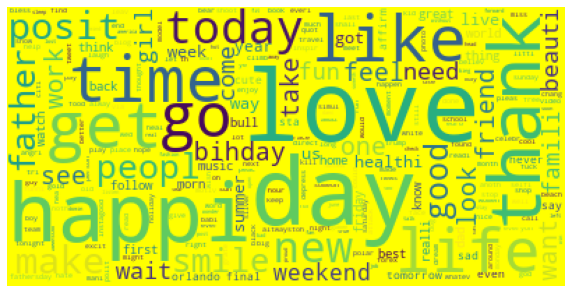

In [45]:
import collections
tweet = ' '.join(train['tweet_stemmed'].values)
tweet = tweet.split()
wordfreq = collections.Counter(tweet)
wordcloud = WordCloud(
 background_color='yellow',
 max_words=2000,
 stopwords=stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Задание 5. Теперь отобразим облако слов для отзывов, не содержащих токсичных комментариев (combine_df['label'] == 0).



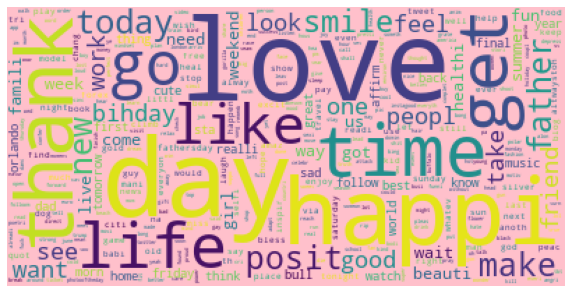

In [46]:
text = ' '.join(train[train['label']==0]['tweet_stemmed'].values)
text = text.split()

wordfreq = collections.Counter(text)
wordcloud = WordCloud(
 background_color='pink',
 max_words=2000,
 stopwords=stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Задание 6. Теперь отобразим облако слов для отзывов, содержащих токсичные комментарии (combine_df['label'] == 1).

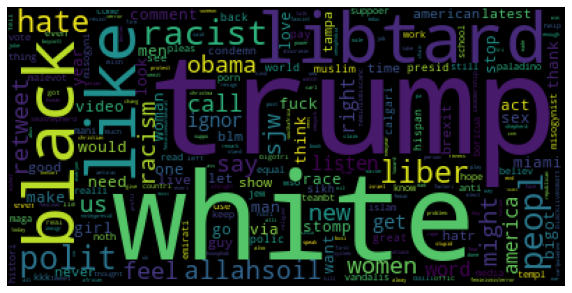

In [49]:
text = ' '.join(train[train['label']==1]['tweet_stemmed'].values)
text = text.split()

wordfreq = collections.Counter(text)
wordcloud = WordCloud(
 background_color='black',
 max_words=2000,
 stopwords=stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()